# Telecom Churn - ML Group Case Study

## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. <br>
In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it <br>
costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

__Goal__ is to build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


https://www.kaggle.com/rahulbhargava21/telecom-churn-case-study

https://github.com/debraj92/IIITB_ML/blob/master/IIITB-ML-CaseStudies/case%20study%204%20-%20Telecom%20churn/Telecom%2BChurn%2BFinal_V5.ipynb

https://github.com/keensam04/upgrad_pgdmlai/blob/master/Telecom_Churn/Telecom_Churn_Case_Study.ipynb

https://www.kaggle.com/quicklearner/telecom-churn

https://github.com/iamurali/upgrad_ml_ai/blob/master/PCA/telecom_chrun_case_study_PCA.ipynb


## Exploratory Data Analysis and Data Cleaning

In [1]:
# pip install modin[ray]

In [2]:
# Import Libraries
import pandas as pd 
# import modin.pandas as pd

import numpy as np 
import os
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 30)
sns.set_style('darkgrid')
style.use('fivethirtyeight')
# pd.options.display.float_format = '{:,.2f}'.format

In [3]:
original_df = pd.read_csv('./telecom_churn_data.csv')
original_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,...,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,...,0.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,...,NaN,56.0,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
original_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [5]:
original_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,...,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,...,0.659363,192.600982,200.981292,197.526489,192.734315,51.904956,51.229937,50.170154,44.719701,121.396219,128.995847,135.410689,136.056613,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186,150.856393,155.318705,151.184830,147.995390,162.780544,157.492308,156.537048,158.681454,14.230438,14.264986,13.270996,13.457549,5.448946,7.533

In [6]:
# Remove Mobile Number
original_df.drop(['mobile_number'],axis=1,inplace=True)

In [7]:
# Convert all Object Type columns to Datetime
date_cols_df = original_df.select_dtypes('object')
date_cols = date_cols_df.columns

In [8]:
date_cols_df.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [9]:
# Convert to Datetime
for col in date_cols:
    date_cols_df[col] = pd.to_datetime(date_cols_df[col],errors='ignore')

In [10]:
date_cols_df.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT
1,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT
2,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17
3,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT
4,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT


In [11]:
date_cols_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      99999 non-null  datetime64[ns]
 1   last_date_of_month_7      99398 non-null  datetime64[ns]
 2   last_date_of_month_8      98899 non-null  datetime64[ns]
 3   last_date_of_month_9      98340 non-null  datetime64[ns]
 4   date_of_last_rech_6       98392 non-null  datetime64[ns]
 5   date_of_last_rech_7       98232 non-null  datetime64[ns]
 6   date_of_last_rech_8       96377 non-null  datetime64[ns]
 7   date_of_last_rech_9       95239 non-null  datetime64[ns]
 8   date_of_last_rech_data_6  25153 non-null  datetime64[ns]
 9   date_of_last_rech_data_7  25571 non-null  datetime64[ns]
 10  date_of_last_rech_data_8  26339 non-null  datetime64[ns]
 11  date_of_last_rech_data_9  25922 non-null  datetime64[ns]
dtypes: datetime64[ns](

In [12]:
print(f'Columns which have been interpreted as Object Type by Pandas but as DateTime : \n{os.linesep.join(date_cols)}')

Columns which have been interpreted as Object Type by Pandas but as DateTime : 
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_9
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_9


In [13]:
# Merge datetime adjusted columns with the original dataframe

original_df[date_cols] = date_cols_df

In [14]:
original_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 225 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   circle_id                 99999 non-null  int64         
 1   loc_og_t2o_mou            98981 non-null  float64       
 2   std_og_t2o_mou            98981 non-null  float64       
 3   loc_ic_t2o_mou            98981 non-null  float64       
 4   last_date_of_month_6      99999 non-null  datetime64[ns]
 5   last_date_of_month_7      99398 non-null  datetime64[ns]
 6   last_date_of_month_8      98899 non-null  datetime64[ns]
 7   last_date_of_month_9      98340 non-null  datetime64[ns]
 8   arpu_6                    99999 non-null  float64       
 9   arpu_7                    99999 non-null  float64       
 10  arpu_8                    99999 non-null  float64       
 11  arpu_9                    99999 non-null  float64       
 12  onnet_mou_6      

In [15]:
# Find and Remove Columns with Zero Variance or Constant Columns

zero_var_columns = []
for col in original_df.columns:
    if original_df[col].nunique() == 1:
        zero_var_columns.append(col)

print(f'Columns which have been identified as Zero Variance Columns are: \n{os.linesep.join(zero_var_columns)}')

Columns which have been identified as Zero Variance Columns are: 
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8
std_ic_t2o_mou_9


In [16]:
zero_var_removed_df = original_df.copy()
zero_var_removed_df.drop(zero_var_columns,axis=1,inplace=True)

In [17]:
zero_var_removed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 209 entries, arpu_6 to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(33)
memory usage: 159.5 MB


In [18]:
zero_var_removed_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,...,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,...,0.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,14.89,289.58,226.21,2.99,1.73,6.53,9.99,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,0.00,0.00,0.00,9.31,0.00,0.00,0.00,0.00,0.00,...,NaN,56.0,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [19]:
pip install Jinja2

Note: you may need to restart the kernel to use updated packages.


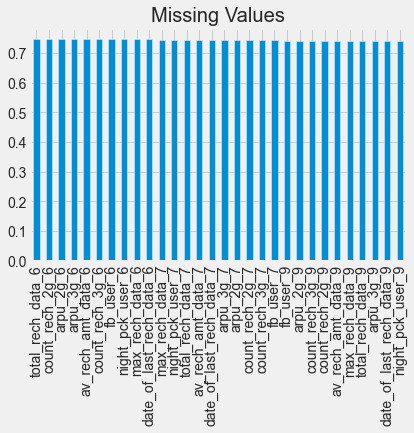

,Total,Percent
total_rech_data_6,74846,0.748467
count_rech_2g_6,74846,0.748467
arpu_2g_6,74846,0.748467
arpu_3g_6,74846,0.748467
av_rech_amt_data_6,74846,0.748467
count_rech_3g_6,74846,0.748467
fb_user_6,74846,0.748467
night_pck_user_6,74846,0.748467
max_rech_data_6,74846,0.748467
date_of_last_rech_data_6,74846,0.748467


In [20]:
# Finding and Handling Missing Values 

def find_missing_values(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    plt.title('Missing Values')
  
    return missing_data

missing_data = find_missing_values(zero_var_removed_df)
missing_data['Percent'].head(30).plot.bar()
plt.show()

missing_data.head(40).style.background_gradient(cmap='Blues')

We can handle the missing values in the date_of_last_rech_* columns by filling it with the last date of the month.

In [21]:
zero_var_removed_df['date_of_last_rech_data_8'].max()

Timestamp('2014-08-31 00:00:00')

In [22]:
date_cols_with_missing_values = [col for col in zero_var_removed_df if col.startswith('date_of_last_rech_')]
date_cols_with_missing_values

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [23]:
# zero_var_removed_df[date_cols_with_missing_values].fillna(zero_var_removed_df[date_cols_with_missing_values].max(),inplace=True)

In [24]:
zero_var_removed_df[date_cols_with_missing_values] = zero_var_removed_df[date_cols_with_missing_values].fillna(zero_var_removed_df[date_cols_with_missing_values].max())

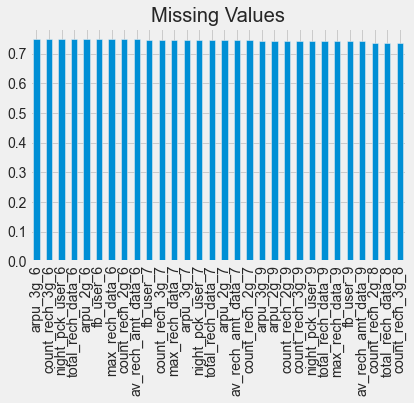

,Total,Percent
arpu_3g_6,74846,0.748467
count_rech_3g_6,74846,0.748467
night_pck_user_6,74846,0.748467
total_rech_data_6,74846,0.748467
arpu_2g_6,74846,0.748467
fb_user_6,74846,0.748467
max_rech_data_6,74846,0.748467
count_rech_2g_6,74846,0.748467
av_rech_amt_data_6,74846,0.748467
fb_user_7,74428,0.744287


In [25]:
missing_data = find_missing_values(zero_var_removed_df)
missing_data['Percent'].head(30).plot.bar()
plt.show()

missing_data.head(40).style.background_gradient(cmap='Blues')

The NaN's in the remaining numeric columns can be filled with 0's 

In [26]:
zero_var_removed_df.fillna(0,inplace=True)

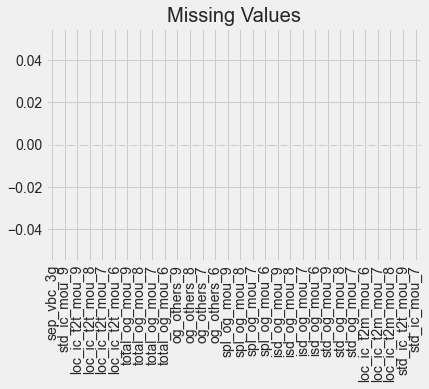

,Total,Percent
sep_vbc_3g,0,0.000000
std_ic_mou_9,0,0.000000
loc_ic_t2t_mou_9,0,0.000000
loc_ic_t2t_mou_8,0,0.000000
loc_ic_t2t_mou_7,0,0.000000
loc_ic_t2t_mou_6,0,0.000000
total_og_mou_9,0,0.000000
total_og_mou_8,0,0.000000
total_og_mou_7,0,0.000000
total_og_mou_6,0,0.000000


In [27]:
missing_data = find_missing_values(zero_var_removed_df)
missing_data['Percent'].head(30).plot.bar()
plt.show()

missing_data.head(40).style.background_gradient(cmap='Blues')

We have removed all the null values. Now lets check the quality of the columns by checking the ratio of Non-Zero values


In [28]:
# Select non date columns
non_date_columns_df = zero_var_removed_df[zero_var_removed_df.columns[~zero_var_removed_df.columns.isin(date_cols_with_missing_values)]]
non_zero_ratios = non_date_columns_df.astype(bool).sum(axis=0)/non_date_columns_df.shape[0]*100

col_to_be_removed = []
for col in non_date_columns_df.columns:
    if non_zero_ratios[col] < 5:
        col_to_be_removed.append(col)

In [29]:
print(f'Columns which have been identified to contain atmost 5% non-zero values are: \n{os.linesep.join(col_to_be_removed)}')

Columns which have been identified to contain atmost 5% non-zero values are: 
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
isd_og_mou_9
og_others_7
og_others_8
og_others_9
night_pck_user_6
night_pck_user_7
night_pck_user_8
night_pck_user_9
sachet_3g_6
sachet_3g_7
sachet_3g_8
sachet_3g_9


In [30]:
# Does not make sense to keep one month data for the feature while others are removed
col_to_be_removed.append('og_others_6')

In [31]:
zero_var_removed_df.drop(col_to_be_removed,axis=1,inplace=True)

In [32]:
# Derived Features from the date columns
def calculate_days_between_recharges(date_month_2 , date_month_1):
    
    days = (date_month_2 - date_month_1).dt.days
    return days

In [33]:
# Include new derived columns and drop original last recharge date features
# zero_var_removed_df['days_between_rech_7_6'] = (zero_var_removed_df.date_of_last_rech_7-zero_var_removed_df.date_of_last_rech_6)
zero_var_removed_df['days_between_rech_7_6'] = calculate_days_between_recharges(zero_var_removed_df.date_of_last_rech_7,zero_var_removed_df.date_of_last_rech_6)

zero_var_removed_df['days_between_rech_8_7'] = calculate_days_between_recharges(zero_var_removed_df.date_of_last_rech_8,zero_var_removed_df.date_of_last_rech_7)

zero_var_removed_df['days_between_rech_data_7_6'] = calculate_days_between_recharges(zero_var_removed_df.date_of_last_rech_data_7,zero_var_removed_df.date_of_last_rech_data_6)
zero_var_removed_df['days_between_rech_data_8_7'] = calculate_days_between_recharges(zero_var_removed_df.date_of_last_rech_data_8,zero_var_removed_df.date_of_last_rech_data_7)

zero_var_removed_df.drop(['date_of_last_rech_7','date_of_last_rech_6','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_6','date_of_last_rech_data_9',],axis=1,inplace=True)

In [34]:
zero_var_removed_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 189 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   arpu_6                      float64
 1   arpu_7                      float64
 2   arpu_8                      float64
 3   arpu_9                      float64
 4   onnet_mou_6                 float64
 5   onnet_mou_7                 float64
 6   onnet_mou_8                 float64
 7   onnet_mou_9                 float64
 8   offnet_mou_6                float64
 9   offnet_mou_7                float64
 10  offnet_mou_8                float64
 11  offnet_mou_9                float64
 12  roam_ic_mou_6               float64
 13  roam_ic_mou_7               float64
 14  roam_ic_mou_8               float64
 15  roam_ic_mou_9               float64
 16  roam_og_mou_6               float64
 17  roam_og_mou_7               float64
 18  roam_og_mou_8               float64
 19  roam_og_mou_9           

In [35]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [36]:
cleaned_df, _ = reduce_mem_usage(zero_var_removed_df)

********
******************************
Column:  loc_og_mou_6
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  loc_og_mou_7
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  loc_og_mou_8
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  loc_og_mou_9
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  std_og_t2t_mou_6
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  std_og_t2t_mou_7
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  std_og_t2t_mou_8
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  std_og_t2t_mou_9
dtype before:  floa

In [37]:
cleaned_df.sample(5)

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,...,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,days_between_rech_7_6,days_between_rech_8_7,days_between_rech_data_7_6,days_between_rech_data_8_7
49399,0.750000,0.260000,258.161011,342.802002,0.000000,0.430000,470.410004,978.130005,0.000000,0.000000,89.790001,111.910004,0.05,3.33,0.500000,0.0,0.0,0.43,0.00,0.00,0.000000,0.00,16.24,36.240002,0.000000,0.000000,19.440001,42.230000,0.00,0.0,0.0,0.0,0.00,0.00,1.0,0.0,0.000000,0.000000,35.689999,78.480003,0.000000,0.000000,454.160004,941.880005,0.000000,0.000000,67.010002,69.68,0.0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,508,0.00,0.00,0.00,0.0,20,53,31,31
43449,256.097992,169.014008,271.420013,206.667999,75.279999,155.279999,28.860001,39.560001,87.410004,53.480000,79.379997,50.189999,0.00,0.00,23.809999,0.0,0.0,0.00,0.00,0.00,58.180000,108.43,27.99,39.560001,67.629997,51.639999,37.830002,28.139999,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,125.809998,160.080002,65.830002,67.709999,17.090000,46.840000,0.860000,0.000000,15.610000,1.830000,0.000000,0.00,0.0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,735,0.00,0.00,0.00,0.0,30,36,31,31
34510,163.744003,182.322998,8.080000,25.362000,181.389999,291.410004,4.890000,13.780000,52.290001,100.480003,0.180000,13.390000,0.00,1.78,0.000000,0.0,0.0,6.78,5.08,27.18,16.459999,3.49,0.00,0.000000,3.880000,15.280000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,20.340000,18.780001,0.000000,0.000000,164.929993,281.130005,0.000000,0.000000,47.959999,77.839996,0.000000,0.00,0.0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,263,0.00,0.00,0.00,0.0,30,24,31,31
27152,924.432007,757.765015,361.678986,0.000000,1617.510010,1180.760010,445.540009,0.000000,150.559998,333.630005,166.410004,0.000000,0.00,0.00,0.000000,0.0,0.0,0.00,0.00,0.00,6.080000,7.16,5.64,0.000000,50.090000,36.660000,31.760000,0.000000,0.00,0.0,0.0,0.0,26.26,0.94,0.4,0.0,56.180000,43.830002,37.410000,0.000000,1611.430054,1173.589966,439.890015,0.000000,61.630001,278.579987,106.430000,0.00,0.0,0.0,...,0,0,0,0,0,0.0,42.0,25.0,0.0,0.0,0.68,0.12,0.0,0.0,93.699997,17.290001,0.0,0.0,118.690002,77.339996,0.0,0.0,7.26,1.97,0.0,0,0,0,0,0,2,1,0,0,0,0,0,0,1,1,0,1374,1.27,11.51,0.41,0.0,31,29,30,30
38724,84.264000,25.827999,53.962002,38.841999,19.930000,2.880000,0.000000,3.760000,56.080002,18.860001,45.630001,33.459999,0.00,0.00,0.000000,0.0,0.0,0.00,0.00,0.00,19.930000,2.88,0.00,3.760000,46.689999,18.860001,35.630001,21.480000,3.11,0.0,0.0,0.0

In [38]:
# Derived Features: Total Recharge Amount = Avg Rech Amount + Total Recharges in Month
def calc_total_rech_amount(avg_recharge , total_recharges_in_month):
    return avg_recharge*total_recharges_in_month

In [39]:
cleaned_df['tot_rech_data_6'] = calc_total_rech_amount(cleaned_df.av_rech_amt_data_6, cleaned_df.total_rech_data_6)
cleaned_df['tot_rech_data_7'] = calc_total_rech_amount(cleaned_df.av_rech_amt_data_7, cleaned_df.total_rech_data_7)
cleaned_df['tot_rech_data_8'] = calc_total_rech_amount(cleaned_df.av_rech_amt_data_8, cleaned_df.total_rech_data_8)

The high value customers are those who have an average spend over the 70th percentile in the 6th and 7th months (good phase).

In [40]:
cleaned_df['avg_rech_good_phase'] = ( cleaned_df.tot_rech_data_6 + cleaned_df.tot_rech_data_7 \
                                    + cleaned_df.total_rech_amt_6  + cleaned_df.total_rech_amt_7 ) / 2 

<AxesSubplot:xlabel='avg_rech_good_phase'>

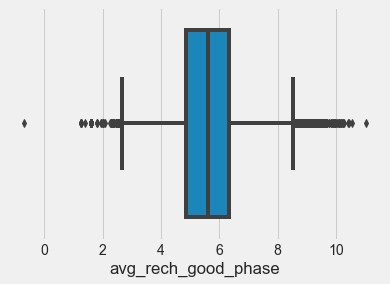

In [41]:
sns.boxplot(np.log(cleaned_df['avg_rech_good_phase']))

In [42]:
cutoff = cleaned_df.avg_rech_good_phase.quantile(0.7)

In [43]:
cutoff

478.0

In [44]:
high_value_customers_df = cleaned_df[cleaned_df.avg_rech_good_phase >= cutoff]
print(high_value_customers_df.shape)

(30001, 193)


### Tag churners and remove attributes of the churn phase

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.<br>
The attributes you need to use to tag churners are:

-   total_ic_mou_9

-   total_og_mou_9

-   vol_2g_mb_9

-   vol_3g_mb_9


In [45]:
def tag_churned_customers(row):
    if ((row.total_ic_mou_9 ==0.0) and (row.total_og_mou_9 == 0.0)) \
       and ((row.vol_2g_mb_9 == 0.0) and (row.vol_3g_mb_9 == 0.0)) :
       return 1
    else:
        return 0
high_value_customers_df['churn']  = high_value_customers_df.apply(lambda x: tag_churned_customers(x),axis=1)

In [46]:
high_value_customers_df['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [47]:
high_value_customers_df['churn'].value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

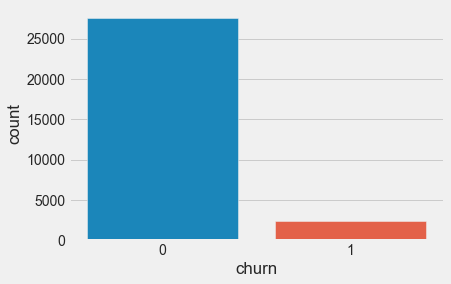

In [48]:
sns.countplot(high_value_customers_df.churn)
plt.show()

### remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [49]:
high_value_customers_df = high_value_customers_df.loc[:,~high_value_customers_df.columns.str.endswith('_9')]

In [50]:
high_value_customers_df.reset_index(drop=True,inplace=True)
high_value_customers_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,...,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,days_between_rech_7_6,days_between_rech_8_7,days_between_rech_data_7_6,days_between_rech_data_8_7,tot_rech_data_6,tot_rech_data_7,tot_rech_data_8,avg_rech_good_phase,churn
0,197.384995,214.815994,213.802994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,252,252,252,0,0,0,1,1,1,252.0,252.0,252.0,30.129999,1.32,5.75,83.57,150.759995,109.610001,212.169998,212.169998,212.169998,212.169998,212.169998,212.169998,0,0,0,0,0,0,1,1,1,1,1,1,968,30.400000,0.000000,101.199997,3.58,25,23,25,23,252.0,252.0,252.0,559.0,1
1,1069.180054,1349.849976,3171.479980,57.840000,54.680000,52.290001,453.429993,567.159973,325.910004,16.23,33.490002,31.639999,23.74,12.59,38.060001,51.389999,31.379999,40.279999,308.630005,447.380005,162.279999,62.130001,55.139999,53.23,0.0,0.0,0.000000,422.160004,533.909973,255.789993,4.300000,23.290001,12.010000,49.889999,31.76000,49.139999,6.66,20.08,16.68,60.860001,75.139999,77.839996,4.5,0.0,6.500000,487.529999,609.239990,350.160004,58.139999,32.259998,...,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,802,57.740002,19.379999,18.740000,0.00,28,32,31,31,0.0,0.0,0.0,1185.0,1
2,378.721008,492.222992,137.362000,413.690002,351.029999,35.080002,94.660004,80.629997,136.479996,0.00,0.000000,0.000000,0.00,0.00,0.000000,297.130005,217.589996,12.490000,80.959999,70.580002,50.540001,0.000000,0.000000,0.00,0.0,0.0,7.150000,378.089996,288.179993,63.040001,116.559998,133.429993,22.580000,13.690000,10.04000,75.690002,0.00,0.00,0.00,130.259995,143.479996,98.279999,0.0,0.0,10.230000,508.359985,431.660004,171.559998,23.840000,9.840000,...,0,154,23,0,2,3,0,0,0,0.0,177.0,69.0,0.000000,356.00,0.03,0.00,750.950012,11.940000,0.000000,0.000000,19.830000,0.000000,0.000000,0.000000,0,1,0,0,1,3,0,0,0,0,1,1,315,21.030001,910.650024,122.160004,0.00,36,30,31,23,0.0,354.0,207.0,696.0,0
3,514.453003,597.752991,637.760010,102.410004,132.110001,85.139999,757.929993,896.679993,983.390015,0.00,0.000000,0.000000,0.00,0.00,0.000000,4.480000,6.160000,23.340000,91.809998,87.930000,104.809998,0.750000,0.000000,1.58,0.0,0.0,0.000000,97.040001,94.089996,129.740005,97.930000,125.940002,61.790001,665.359985,808.73999,876.989990,0.00,0.00,0.00,763.289978,934.690002,938.789978,0.0,0.0,0.000000,860.340027,1028.790039,1068.540039,2.480000,10.190000,...,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.00,0.00,0.00

In [51]:
def box_plot_for_feature(df,feature_without_month):
    plt.figure(figsize=(18,7))
    plt.subplot(1,3,1)
    sns.boxplot(data = df, y = feature_without_month+'_6' ,x="churn",hue="churn",showfliers=False)

    plt.subplot(1,3,2)
    sns.boxplot(data = df, y = feature_without_month+'_7' ,x="churn",hue="churn",showfliers=False)

    plt.subplot(1,3,3)
    sns.boxplot(data = df, y = feature_without_month+'_8' ,x="churn",hue="churn",showfliers=False)

    plt.show()

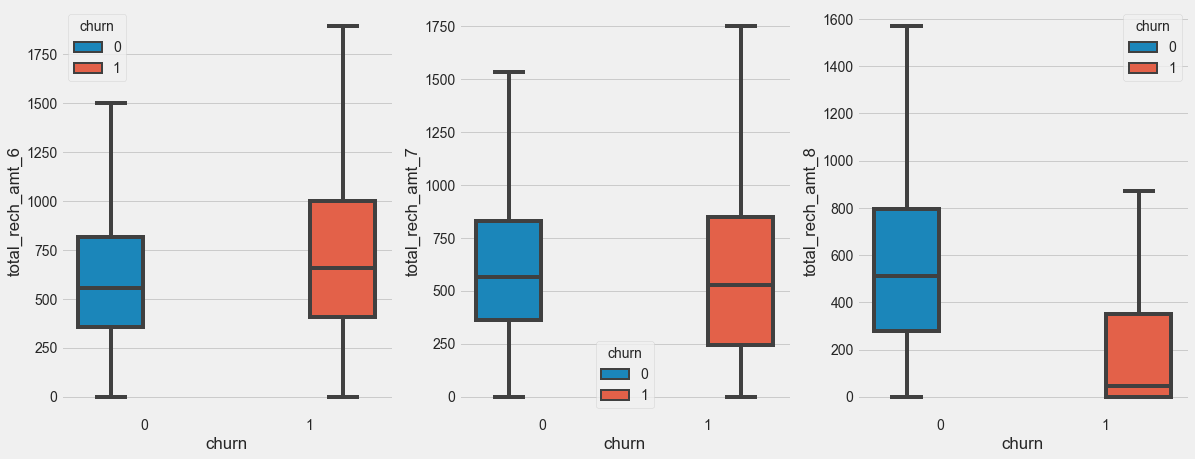

In [52]:
box_plot_for_feature(high_value_customers_df,'total_rech_amt')

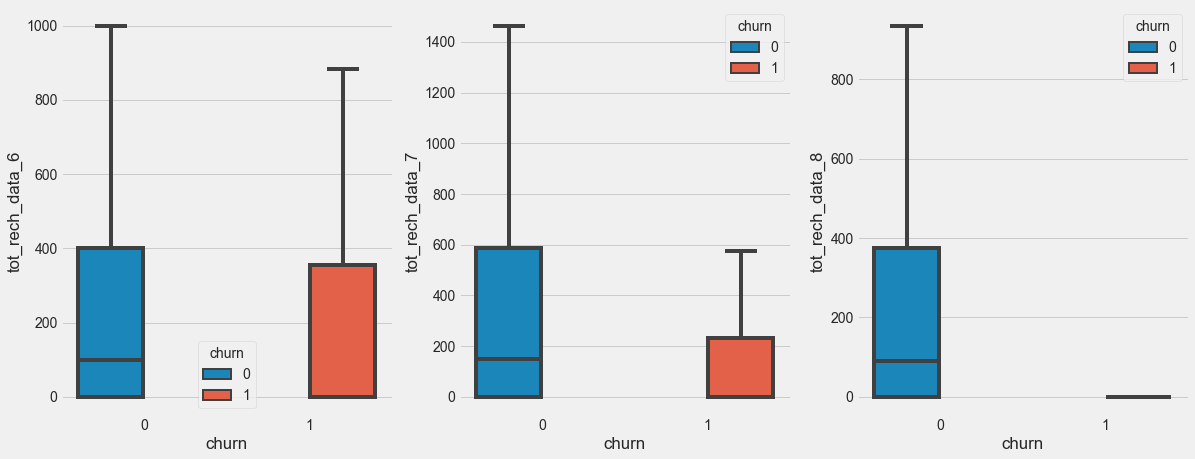

In [53]:
box_plot_for_feature(high_value_customers_df,'tot_rech_data')

All the recharge amount drop in the last action month.

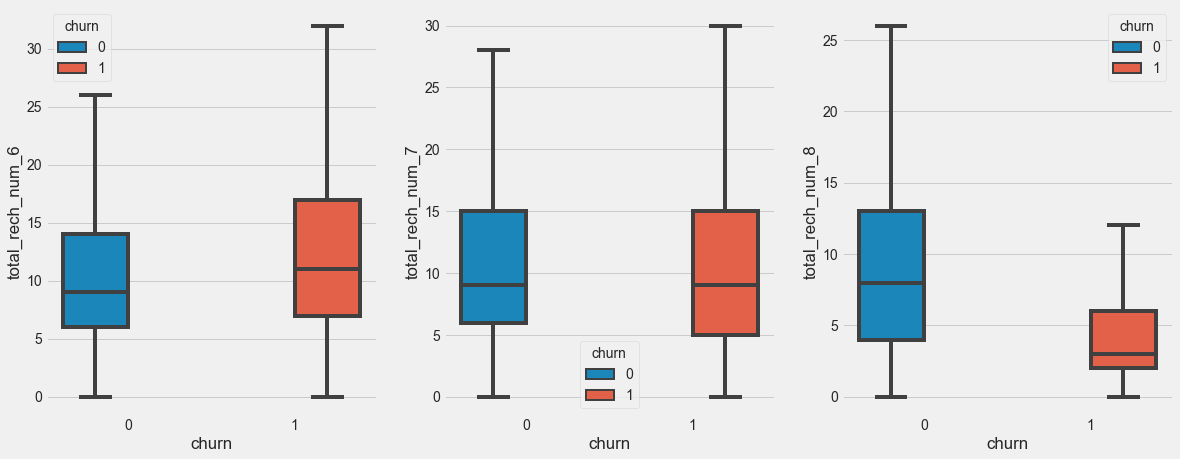

In [54]:
box_plot_for_feature(high_value_customers_df,'total_rech_num')

The frequency of recharge is also dropping towards the action phase for the customer who churned.

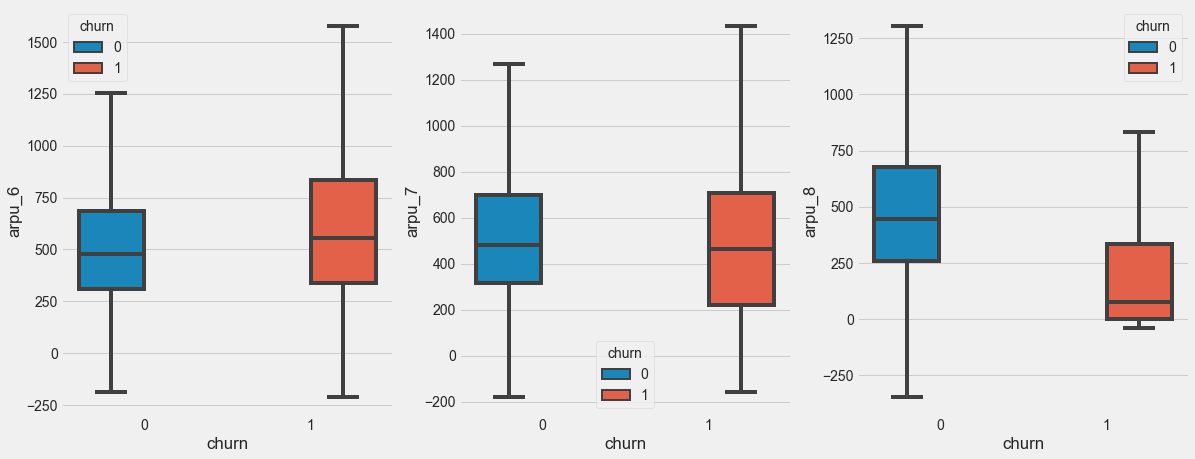

In [55]:
box_plot_for_feature(high_value_customers_df,'arpu')

In [56]:
high_value_customers_df['months_on_network'] = high_value_customers_df.aon / 30
high_value_customers_df.drop('aon',axis=1,inplace=True)

<AxesSubplot:xlabel='months_on_network', ylabel='Density'>

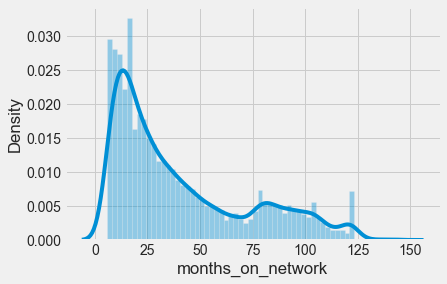

In [57]:
sns.distplot(high_value_customers_df['months_on_network'],60)

<AxesSubplot:xlabel='churn', ylabel='months_on_network'>

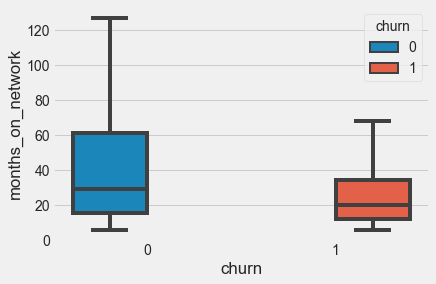

In [58]:
sns.boxplot(data = high_value_customers_df, y = 'months_on_network' ,x="churn",hue="churn",showfliers=False)

Majority of the customers are on the network for 60 months or less.
And the Customers who have churned are not that old in the network . So the churn usually happens when they are between 20 - 40 Months on the network.

In [59]:
data_for_modelling_df = high_value_customers_df.copy()

## Bivariate Analysis

In [60]:
high_value_customers_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,...,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,days_between_rech_7_6,days_between_rech_8_7,days_between_rech_data_7_6,days_between_rech_data_8_7,tot_rech_data_6,tot_rech_data_7,tot_rech_data_8,avg_rech_good_phase,churn,months_on_network
0,197.384995,214.815994,213.802994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,252,252,252,0,0,0,1,1,1,252.0,252.0,252.0,30.129999,1.32,5.75,83.57,150.759995,109.610001,212.169998,212.169998,212.169998,212.169998,212.169998,212.169998,0,0,0,0,0,0,1,1,1,1,1,1,30.400000,0.000000,101.199997,3.58,25,23,25,23,252.0,252.0,252.0,559.0,1,32.266667
1,1069.180054,1349.849976,3171.479980,57.840000,54.680000,52.290001,453.429993,567.159973,325.910004,16.23,33.490002,31.639999,23.74,12.59,38.060001,51.389999,31.379999,40.279999,308.630005,447.380005,162.279999,62.130001,55.139999,53.23,0.0,0.0,0.000000,422.160004,533.909973,255.789993,4.300000,23.290001,12.010000,49.889999,31.76000,49.139999,6.66,20.08,16.68,60.860001,75.139999,77.839996,4.5,0.0,6.500000,487.529999,609.239990,350.160004,58.139999,32.259998,...,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,57.740002,19.379999,18.740000,0.00,28,32,31,31,0.0,0.0,0.0,1185.0,1,26.733333
2,378.721008,492.222992,137.362000,413.690002,351.029999,35.080002,94.660004,80.629997,136.479996,0.00,0.000000,0.000000,0.00,0.00,0.000000,297.130005,217.589996,12.490000,80.959999,70.580002,50.540001,0.000000,0.000000,0.00,0.0,0.0,7.150000,378.089996,288.179993,63.040001,116.559998,133.429993,22.580000,13.690000,10.04000,75.690002,0.00,0.00,0.00,130.259995,143.479996,98.279999,0.0,0.0,10.230000,508.359985,431.660004,171.559998,23.840000,9.840000,...,0,154,23,0,2,3,0,0,0,0.0,177.0,69.0,0.000000,356.00,0.03,0.00,750.950012,11.940000,0.000000,0.000000,19.830000,0.000000,0.000000,0.000000,0,1,0,0,1,3,0,0,0,0,1,1,21.030001,910.650024,122.160004,0.00,36,30,31,23,0.0,354.0,207.0,696.0,0,10.500000
3,514.453003,597.752991,637.760010,102.410004,132.110001,85.139999,757.929993,896.679993,983.390015,0.00,0.000000,0.000000,0.00,0.00,0.000000,4.480000,6.160000,23.340000,91.809998,87.930000,104.809998,0.750000,0.000000,1.58,0.0,0.0,0.000000,97.040001,94.089996,129.740005,97.930000,125.940002,61.790001,665.359985,808.73999,876.989990,0.00,0.00,0.00,763.289978,934.690002,938.789978,0.0,0.0,0.000000,860.340027,1028.790039,1068.540039,2.480000,10.190000,...,0,0,0,0,0,0,0,0,0,0.0

In [61]:
def feature_counts(df,feature,text,set_logscale=False):
    '''
        df: Dataframe
        feature: Column to group on
        text: Display Text for feature
        set_logscale: Set log scale for y-axis

        This function plots the sum of the target variable grouped by
        a categorical feature
    '''
    
    plt.figure(figsize=(10,7))
    plt.title(f'Top {feature} by count',fontsize = 18)
    
    ax =sns.countplot(data=df,x = feature,hue='churn')
   
    if set_logscale:
        ax.set_yscale("log")
    plt.ylabel('Count',fontsize = 18)
    plt.xlabel(text,fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.xticks(rotation=90,fontsize = 16)
    plt.show()

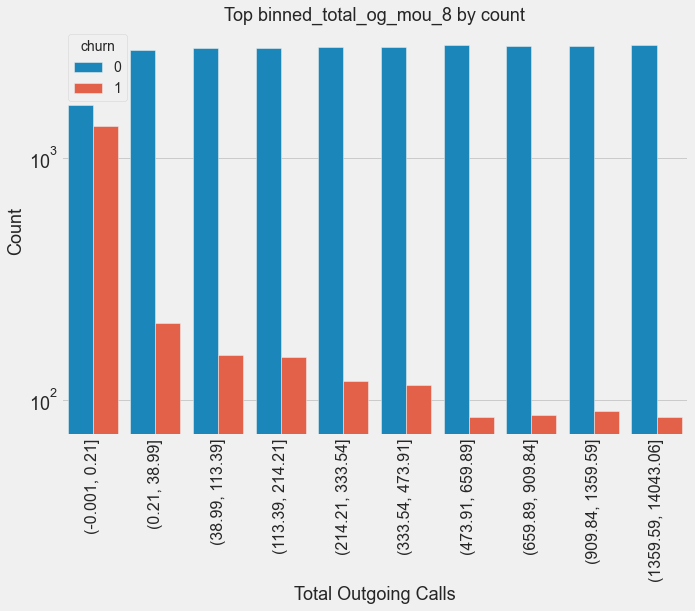

In [62]:
# customers not using outgoing calls for september are likely to churn
high_value_customers_df['binned_total_og_mou_8'] = pd.qcut(high_value_customers_df['total_og_mou_8'], 10)
feature_counts(high_value_customers_df,'binned_total_og_mou_8',text='Total Outgoing Calls',set_logscale=True)

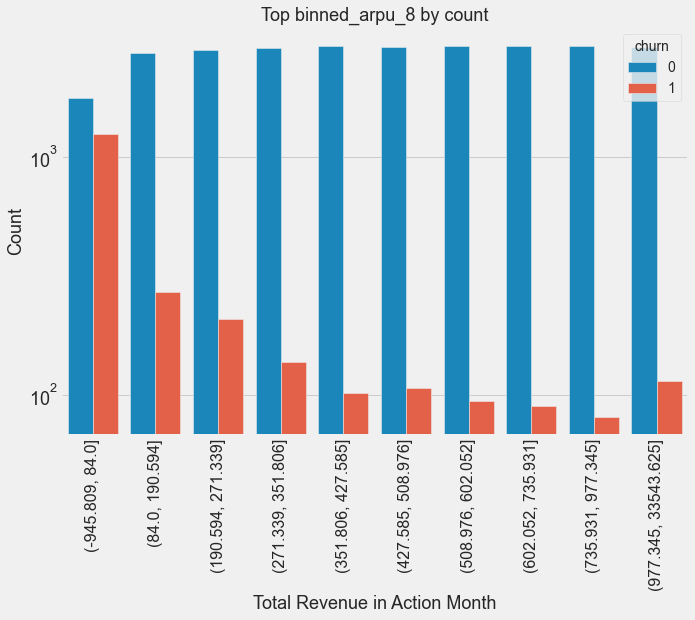

In [63]:
# customers having low arpu in action period is likely to churn
high_value_customers_df['binned_arpu_8'] = pd.qcut(high_value_customers_df['arpu_8'], 10)
feature_counts(high_value_customers_df,'binned_arpu_8',text='Total Revenue in Action Month',set_logscale=True)

## Modelling

As we have a high class imbalance between churn and non churn customers. We will use Stratified Split 

In [64]:
from sklearn.model_selection import train_test_split

y = data_for_modelling_df.pop('churn')
X = data_for_modelling_df

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

<BarContainer object of 148 artists>

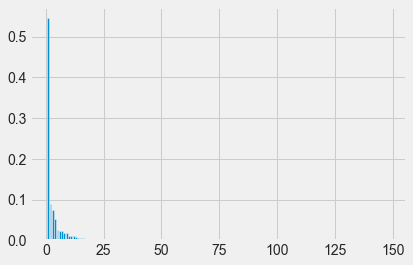

In [66]:
from sklearn.decomposition import IncrementalPCA,PCA

pca = PCA()
pca.fit(X_train)
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

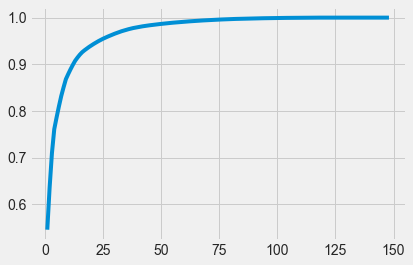

In [67]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [68]:
pca_final = IncrementalPCA(n_components=25)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(24000, 25)

<AxesSubplot:>

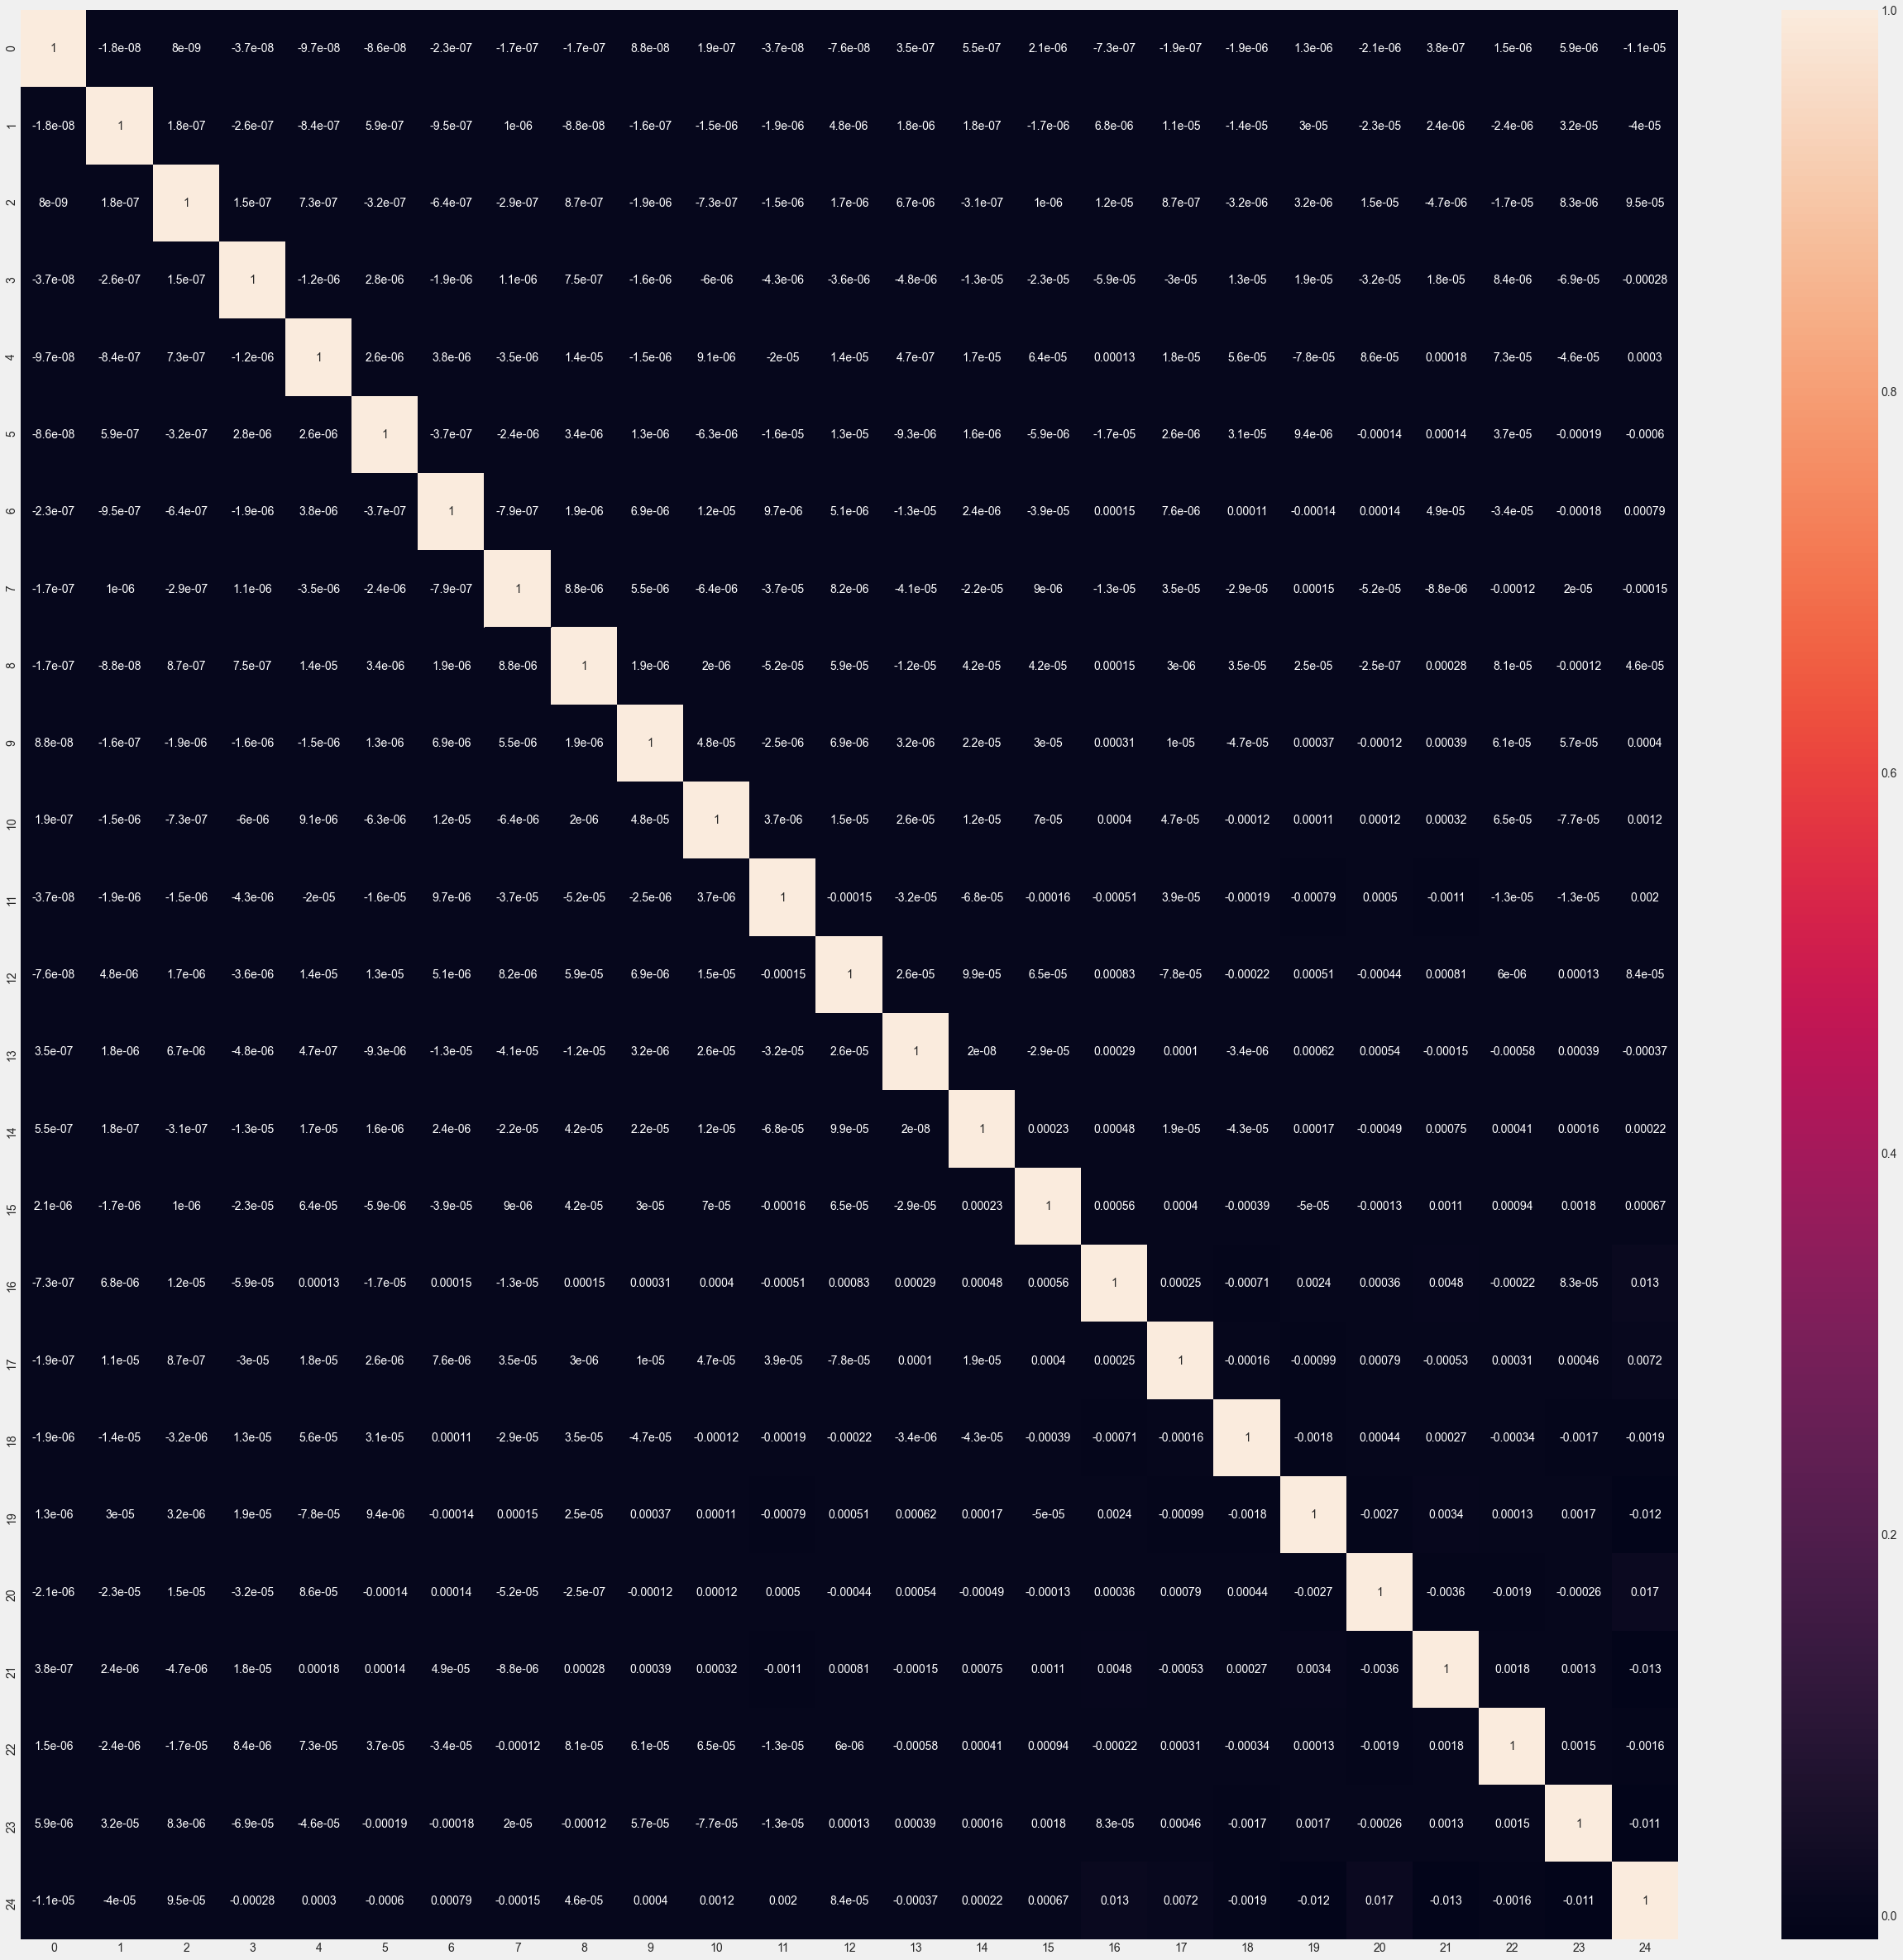

In [69]:
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=(40, 40))
sns.heatmap(corrmat, annot=True)

In [70]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(df_train_pca,y_train)

LogisticRegression()

In [71]:
X_test = scaler.transform(X_test)
df_test_pca = pca_final.transform(X_test)

In [72]:
df_test_pca.shape

(6001, 25)

In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test,lr_model.predict(df_test_pca)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5513
           1       0.56      0.11      0.18       488

    accuracy                           0.92      6001
   macro avg       0.74      0.55      0.57      6001
weighted avg       0.90      0.92      0.90      6001



## Handling Class Imbalance

In [74]:
!pip install imblearn

In [75]:
from imblearn.over_sampling import SMOTE 


X_train, y_train = SMOTE().fit_resample(X_train, y_train)
y_train =pd.Series(y_train)

In [76]:
pca_final = IncrementalPCA(n_components=25)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(44094, 25)

In [77]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(df_train_pca,y_train)

LogisticRegression()

In [78]:
df_test_pca = pca_final.transform(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test,lr_model.predict(df_test_pca)))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      5513
           1       0.24      0.75      0.36       488

    accuracy                           0.78      6001
   macro avg       0.61      0.77      0.62      6001
weighted avg       0.91      0.78      0.83      6001



## XGBOOST

In [79]:
!pip install xgboost

In [80]:
!pip install mlxtend

[23:58:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


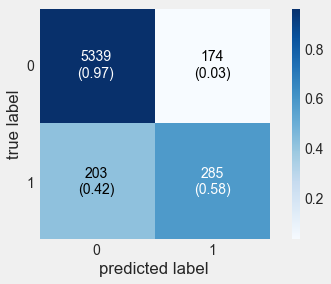

In [81]:
from xgboost import XGBClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,roc_auc_score

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [82]:
from sklearn.metrics import roc_auc_score,roc_curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

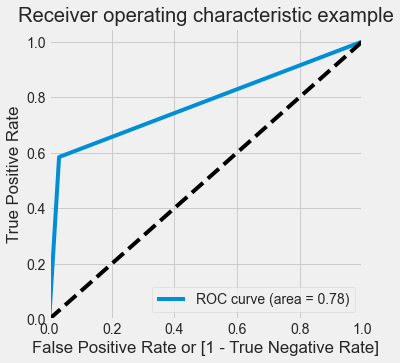

(array([0.        , 0.03156176, 1.        ]),
 array([0.        , 0.58401639, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [83]:
fpr, tpr, thresholds = roc_curve( y_test, y_pred, drop_intermediate = False )
draw_roc(y_test, y_pred)


## Explain the Model

In [84]:
!pip install shap

In [85]:
import shap
# load JS visualization code to notebook
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [88]:
X_df = pd.DataFrame(X_train,columns=X.columns)
X_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,...,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,days_between_rech_7_6,days_between_rech_8_7,days_between_rech_data_7_6,days_between_rech_data_8_7,tot_rech_data_6,tot_rech_data_7,tot_rech_data_8,avg_rech_good_phase,months_on_network
0,0.182832,0.123162,0.070629,0.027607,0.020146,0.012472,0.046844,0.023884,0.029769,0.017154,0.000000,0.003449,0.025520,0.000000,0.005533,0.021327,0.019060,0.011170,0.035729,0.032281,0.063850,0.038444,0.031535,0.068423,0.000000,0.000000,0.000000,0.034062,0.042465,0.045329,0.002597,0.002548,0.001008,0.007897,0.004436,0.000976,0.061903,0.000000,0.000000,0.014539,0.005627,0.001511,0.001417,0.000000,0.000000,0.045654,0.034518,0.037140,0.013569,0.013414,...,0.000000,0.093248,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.0,0.000000,0.019215,0.000000,0.000000,0.000000,0.000000,0.000000,0.012239,0.000000,0.000000,0.053116,0.003599,0.007014,0.021304,0.003208,0.003575,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.071429,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.627119,0.383333,0.830508,0.500000,0.001373,0.000000,0.000000,0.002913,0.025598
1,0.149620,0.123071,0.082415,0.053116,0.045724,0.161058,0.019509,0.022776,0.025522,0.005954,0.000000,0.000000,0.029326,0.000000,0.000000,0.000347,0.000984,0.001120,0.004015,0.008817,0.008689,0.000000,0.000000,0.000000,0.017168,0.002738,0.151238,0.001995,0.006184,0.004996,0.041550,0.044977,0.230723,0.011258,0.014579,0.015014,0.002164,0.000000,0.000000,0.045475,0.045208,0.137996,0.016331,0.037755,0.115934,0.039483,0.051885,0.149186,0.001009,0.000767,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004737,0.003599,0.007014,0.002376,0.003208,0.003575,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.508475,0.483333,0.508475,0.500000,0.000000,0.000000,0.000000,0.001020,0.042260
2,0.156875,0.142798,0.081472,0.059366,0.053282,0.043406,0.025249,0.033126,0.024494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028311,0.017484,0.008708,0.016356,0.023322,0.027908,0.001917,0.000000,0.000000,0.000000,0.000000,0.000000,0.024641,0.030708,0.021023,0.033150,0.037265,0.050054,0.015453,0.021728,0.014341,0.003914,0.004637,0.004745,0.042825,0.045846,0.041114,0.000000,0.010942,0.002986,0.058404,0.066073,0.057668,0.010697,0.009227,...,0.016667,0.099035,0.099035,0.099035,0.023810,0.020833,0.029412,0.000000,0.0,0.000000,0.020408,0.035281,0.037922,0.042879,0.047144,0.004874,0.000000,0.008025,0.021813,0.004737,0.003599,0.007014,0.002331,0.004987,0.003575,0.25,0.2,0.2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,1.0,0.039968,0.025532,0.000000,0.000279,0.559322,0.516667,0.491525,0.45000

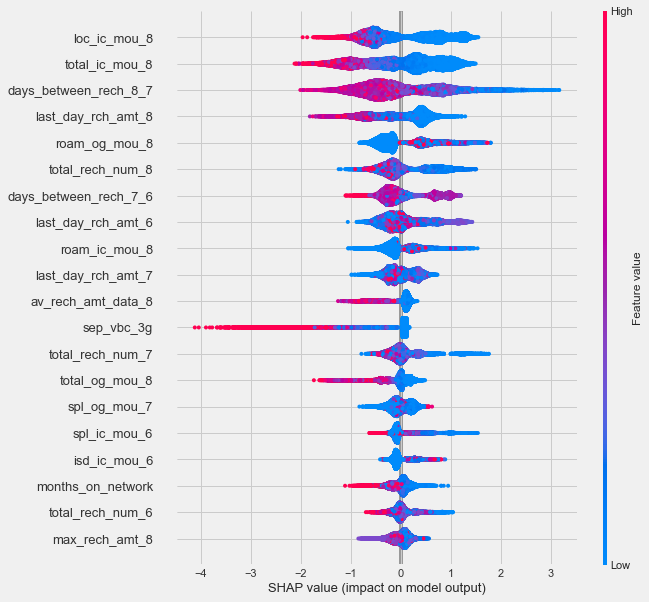

In [89]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_df)

This plot is made of all the dots in the train data. It demonstrates the following information:
-   __Feature importance__: Variables are ranked in descending order.
-   __Impact__: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
-   __Original value__: Color shows whether that variable is high (in red) or low (in blue) for that observation.

### Mean absolute importance of each feature

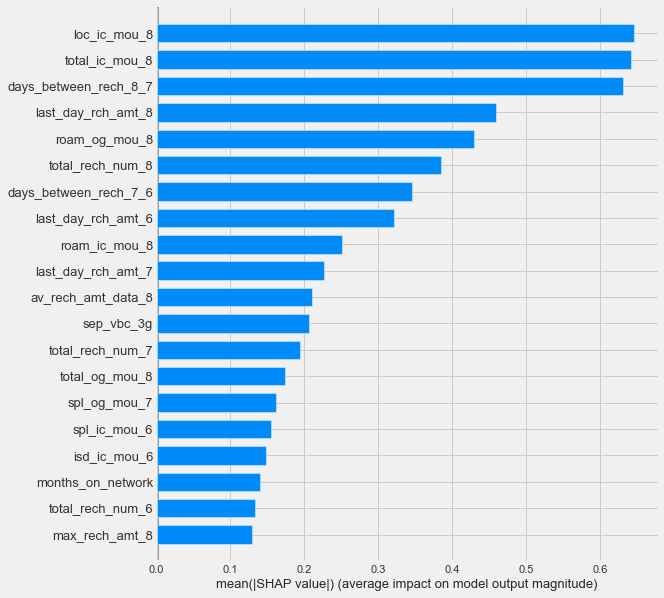

In [92]:
shap.summary_plot(shap_values, X_df, plot_type="bar")